Number of spikes: [446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446
 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446
 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446
 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446
 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446 446
 446 446 446 446 446 446 446 446 446 446]
Spike times: [  4.40000000e+00   4.40000000e+00   4.40000000e+00 ...,   9.99680000e+03
   9.99680000e+03   9.99680000e+03] ms


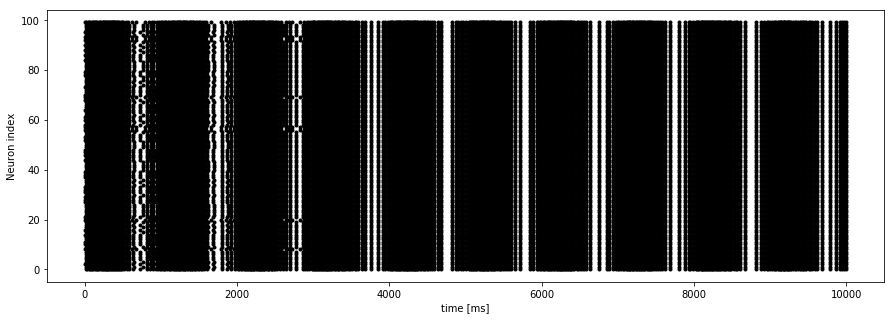

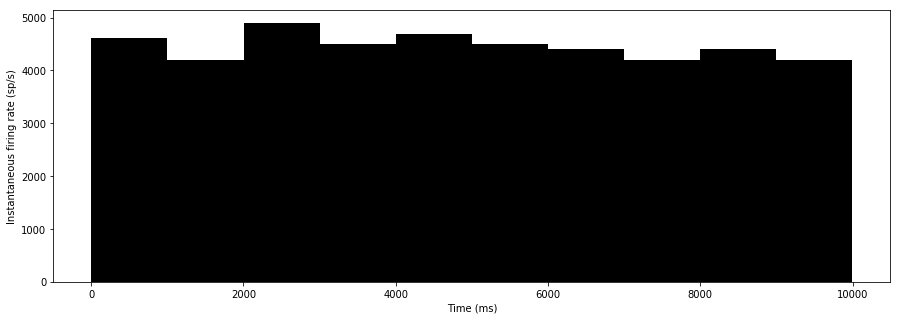

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

print("Number of spikes: %s" % spikemon.count[:])
print("Spike times: %s" % spikemon.t[:])

fig = figure(figsize=(15, 5))
plt.plot(spikemon.t/b2.ms, spikemon.i, '.k')
xlabel('time [ms]')
ylabel('Neuron index')

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms, facecolor='k')
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');




[   3.4    3.4    3.4 ...,  199.   199.   199. ] ms
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 13 13 13 13 13 13 14 14 13
 13 13 13 13 13 13 13 14 13 13 13 13 13 13 13 13 14 13 13 13 13 13 13 13 13
 13 13 14 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13]
13.06
0.0564
FANO: 0.00431852986217
[ 200.8  200.8  200.8 ...,  391.2  391.2  391.2] ms
[15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15]
14.03
0.9691
FANO: 0.0690734141126
[ 0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036
  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036
  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4

[ 0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097
  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097
  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097
  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097  0.6097
  0.6097  0.6097  0.6097  0.6097  0.6097  0.6213  0.6213  0.6213  0.6213
  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213
  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213
  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213  0.6213
  0.6213  0.6213  0.63    0.63    0.63    0.63    0.63    0.63    0.63
  0.63    0.63    0.63    0.63    0.63    0.63    0.63    0.63    0.63
  0.63    0.63    0.63    0.63    0.63    0.63    0.63    0.63    0.63
  0.63    0.6556  0.6556  0.6556  0.6556  0.6556  0.6556  0.6556  0.6556
  0.6556  0.6556  0.6556  0.6556  0.6556  0.6556  0.6556  0.6556  0.6556
  0.6556  0.6556  0.6556  0.6556  0.6556  0.6556  0.6556 

[ 1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464
  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464
  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464
  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464  1.8464
  1.8464  1.8464  1.8464  1.8464  1.8464  1.8534  1.8534  1.8534  1.8534
  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534
  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534
  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534
  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534
  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534
  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534  1.8534
  1.8534  1.8992  1.8992  1.8992  1.8992  1.8992  1.8992  1.8992  1.8992
  1.8992  1.8992  1.8992  1.8992  1.8992  1.8992  1.8992  1.8992  1.8992
  1.8992  1.8992  1.8992  1.8992  1.8992  1.8992  1

[ 2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073
  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073
  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073
  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073
  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073
  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073  2.6073
  2.6073  2.6073  2.6073  2.6073  2.6073  2.6565  2.6565  2.6565  2.6565
  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565
  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565
  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565
  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565  2.6565
  2.6565  2.6817  2.6817  2.6817  2.6817  2.6817  2.6817  2.6817  2.6817
  2.6817  2.6817  2.6817  2.6817  2.6817  2.6817  2.6817  2.6817  2.6817
  2.6817  2.6817  2.6817  2.6817  2.6817  2.6817  2

[ 3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081  3.6081
  3.6081  3.7077  3.7077  3.7077  3.7077  3.7077  3.7077  3.7077  3.7077
  3.7077  3.7077  3.7077  3.7077  3.7077  3.7077  3.7077  3.7077  3.7077
  3.7077  3.7077  3.7077  3.7077  3.7077  3.7077  3

[ 4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326  4.6326
  4.6326  4.7094  4.7094  4.7094  4.7094  4.7094  4.7094  4.7094  4.7094
  4.7094  4.7094  4.7094  4.7094  4.7094  4.7094  4.7094  4.7094  4.7094
  4.7094  4.7094  4.7094  4.7094  4.7094  4.7094  4

[ 5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063  5.6063
  5.6063  5.6455  5.6455  5.6455  5.6455  5.6455  5.6455  5.6455  5.6455
  5.6455  5.6455  5.6455  5.6455  5.6455  5.6455  5.6455  5.6455  5.6455
  5.6455  5.6455  5.6455  5.6455  5.6455  5.6455  5

[ 6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081  6.4081
  6.4081  6.4217  6.4217  6.4217  6.4217  6.4217  6.4217  6.4217  6.4217
  6.4217  6.4217  6.4217  6.4217  6.4217  6.4217  6.4217  6.4217  6.4217
  6.4217  6.4217  6.4217  6.4217  6.4217  6.4217  6

[ 6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589  6.8589
  6.8589  6.8977  6.8977  6.8977  6.8977  6.8977  6.8977  6.8977  6.8977
  6.8977  6.8977  6.8977  6.8977  6.8977  6.8977  6.8977  6.8977  6.8977
  6.8977  6.8977  6.8977  6.8977  6.8977  6.8977  6

[ 7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338  7.6338
  7.6338  7.7384  7.7384  7.7384  7.7384  7.7384  7.7384  7.7384  7.7384
  7.7384  7.7384  7.7384  7.7384  7.7384  7.7384  7.7384  7.7384  7.7384
  7.7384  7.7384  7.7384  7.7384  7.7384  7.7384  7

[ 8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148  8.7148
  8.7148] s
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

[ 9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428  9.6428
  9.6428  9.7779  9.7779  9.7779  9.7779  9.7779  9.7779  9.7779  9.7779
  9.7779  9.7779  9.7779  9.7779  9.7779  9.7779  9.7779  9.7779  9.7779
  9.7779  9.7779  9.7779  9.7779  9.7779  9.7779  9

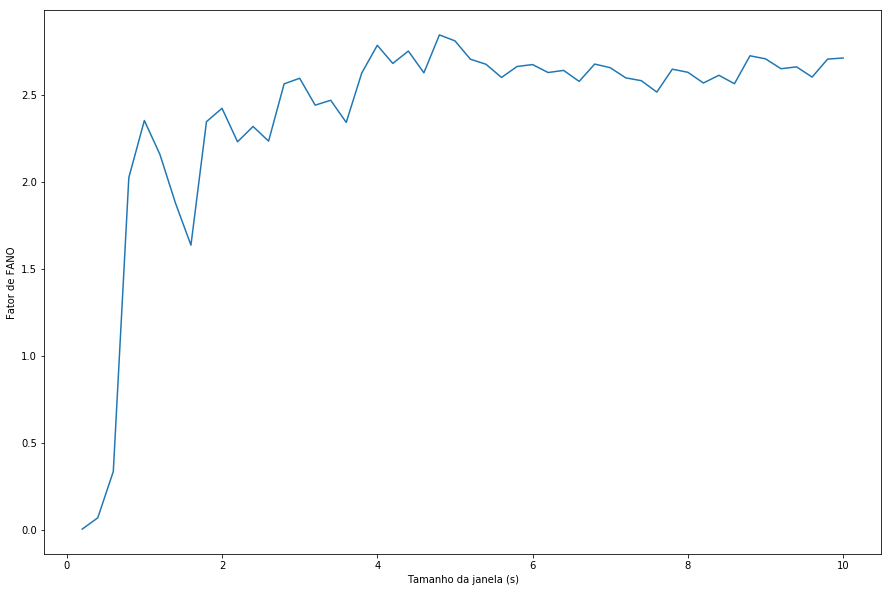

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()


aux=[]
win = []
fano = []
for k in range(50):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    
    b2.run(200*b2.ms)
    win.append(200000*ms*(k+1)*ms)
    print(spike_monitor.t[:])
    print(spike_monitor.count[:])
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    print(mean)
    var = np.var(aux)
    print(var)
    print("FANO: {}".format(var/mean))
    fano.append(var/mean)
plt.figure(figsize=(15,10))
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()